In [54]:
import os
try:
    import mkl
    mkl.set_num_threads(1)
except:
    pass

os.environ['OPENBLAS_NUM_THREADS'] = "1"
os.environ['OMP_NUM_THREADS'] = "1"

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import kwant
import functions_spins as func
from types import SimpleNamespace

import numpy as np

## Testowy układ (bez pola w leadach)

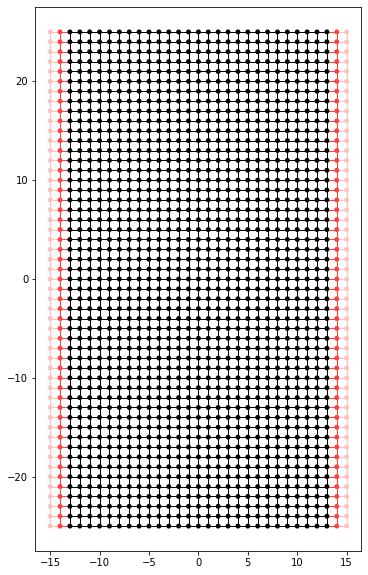

In [9]:
# syst = func.make_system(a=1, W=20, L=26, dL=20, Wb=20)
syst = func.make_system(a=1, W=50, L=26, dL=20, Wb=50)
# kwant.plot(syst);
par = SimpleNamespace(t=1, mu=2.20, e_z=0.0, alpha=0.50 )
kwant.plot(syst, site_color=lambda site: syst.hamiltonian(site, site, par)[0,1],
                   fig_size=(10, 10),  colorbar = False)
plt.show()

/root/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  """Entry point for launching an IPython kernel.
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/plotter.py:1409: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  ham = syst.cell_hamiltonian(args, params=params)
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/system.py:274: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  sparse=sparse, params=params)
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/plotter.py:1412: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Ins

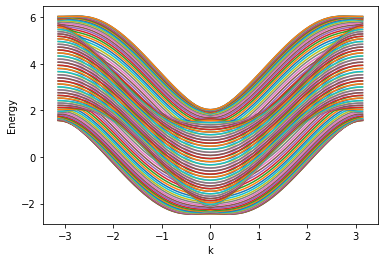

In [11]:
kwant.plotter.bands(syst.leads[0], show=False, args=[par])
plt.show()

# Zerowe pole magnetyczne

In [42]:
phis = np.arange(0, 6.35, 0.1)
currents = []
energies = []
eigvals = []
Ts = []
for phi in phis:
    par = SimpleNamespace(t=1, mu=2.20, e_z=0.0, alpha=0.1 )
    smatrix = kwant.smatrix(syst, energy=0.0, args=[par])
    supercurrent, energy, eigVl = func.supercurrent_tight_binding(smatrix=smatrix, phi=phi, Delta=0.3)
    currents.append(supercurrent)
    energies.append(energy)
    eigvals.append(eigVl)
    Ts.append(smatrix.transmission(1, 0))

currents = np.array(currents)
energies = np.array(energies)
eigvals = np.array(eigvals)

/root/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:8: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/solvers/common.py:164: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  params=params)[:2]
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/solvers/common.py:191: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  prop, stab = lead.modes(energy, args, params=params)
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/system.py:305: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictio

(64, 216) (64,)


Text(0, 0.5, 'E')

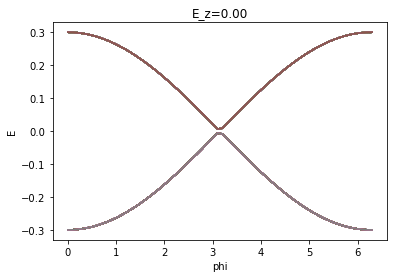

In [43]:
print(eigvals.shape, phis.shape)
for i in range(eigvals.shape[1]):
    plt.plot(phis, eigvals[:,i], "-")

plt.title('E_z=%.2f' %par.e_z)
plt.xlabel('phi')
plt.ylabel('E')

# maly Zeeman

In [39]:
phis = np.arange(0, 6.35, 0.1)
currents = []
energies = []
eigvals = []
Ts = []
for phi in phis:
    par = SimpleNamespace(t=1, mu=2.20, e_z=0.01, alpha=0.1 )
    smatrix = kwant.smatrix(syst, energy=0.0, args=[par])
    supercurrent, energy, eigVl = func.supercurrent_tight_binding(smatrix=smatrix, phi=phi, Delta=0.3)
    currents.append(supercurrent)
    energies.append(energy)
    eigvals.append(eigVl)
    Ts.append(smatrix.transmission(1, 0))

currents = np.array(currents)
energies = np.array(energies)
eigvals = np.array(eigvals)

/root/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:8: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/solvers/common.py:164: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  params=params)[:2]
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/solvers/common.py:191: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  prop, stab = lead.modes(energy, args, params=params)
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/system.py:305: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictio

(64, 216) (64,)


Text(0, 0.5, 'E')

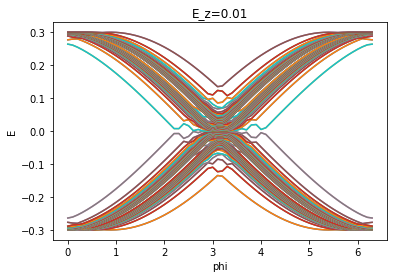

In [40]:
print(eigvals.shape, phis.shape)
for i in range(eigvals.shape[1]):
    plt.plot(phis, eigvals[:,i], "-")

plt.title('E_z=%.2f' %par.e_z)
plt.xlabel('phi')
plt.ylabel('E')

# Niezerowe pole

In [36]:
ezs = np.arange(0.1, 0.60, 0.1)
phis = np.arange(0, 6.35, 0.1)
evals_all = []
for ez in ezs:
    eigvals = []
    Ts = []
    for phi in phis:
        par = SimpleNamespace(t=1, mu=2.20, e_z=ez, alpha=0.1 )
        smatrix = kwant.smatrix(syst, energy=0.0, args=[par])
        supercurrent, energy, eigVl = func.supercurrent_tight_binding(smatrix=smatrix, phi=phi, Delta=0.3)
        eigvals.append(eigVl)

    evals_all.append(eigvals)
    
evals_all = np.array(evals_all)

/root/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:9: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  if __name__ == '__main__':
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/solvers/common.py:164: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  params=params)[:2]
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/solvers/common.py:191: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  prop, stab = lead.modes(energy, args, params=params)
/root/miniconda3/envs/python3/lib/python3.7/site-packages/kwant/system.py:305: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide na

(5, 64, 216)


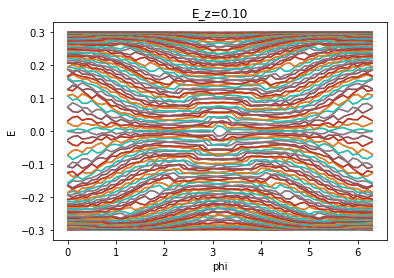

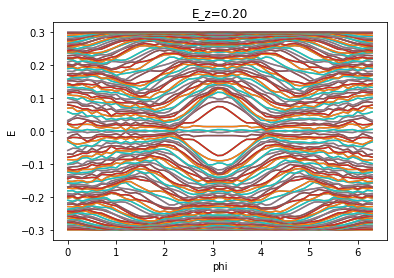

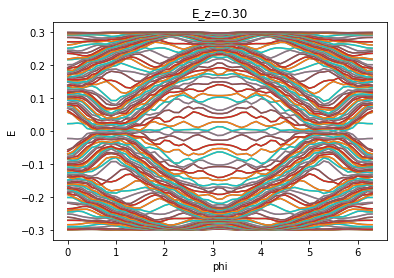

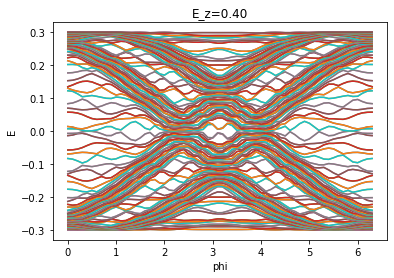

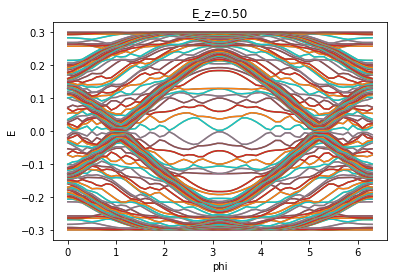

In [38]:
print(evals_all.shape)
for j in range(evals_all.shape[0]):
    plt.figure()
    for i in range(evals_all.shape[2]):
        plt.plot(phis, evals_all[j, :, i], "-")
        
    plt.title('E_z=%.2f' %ezs[j])
    plt.xlabel('phi')
    plt.ylabel('E')


# Prąd krytyczny a E_gs

In [52]:
ezs = np.arange(0, 0.8, 0.01)
phis = np.arange(0, 6.35, 0.05)
currents_all = []
energies_all = []
energies_lowest = []
for ez in ezs:
    currents = []
    energies = []
    e_lowest = []
    Ts = []
    for phi in phis:
        par = SimpleNamespace(t=1, mu=2.20, e_z=ez, alpha=0.1 )
        smatrix = kwant.smatrix(syst, energy=0.0, args=[par])
        supercurrent, energy, evals = func.supercurrent_tight_binding(smatrix=smatrix, phi=phi, Delta=0.3)
        currents.append(supercurrent)
        energies.append(energy)
        Ts.append(smatrix.transmission(1, 0))

    currents_all.append(currents)
    energies_all.append(energies)
    
currents_all = np.array(currents_all)
energies_all = np.array(energies_all)

Text(0.5, 1.0, 'E_gs')

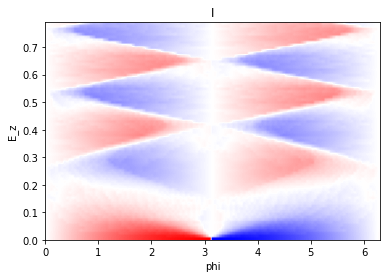

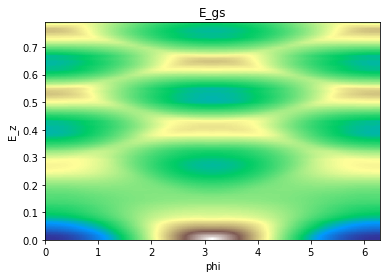

In [53]:
plt.figure()
plt.imshow(currents_all, aspect='auto', origin='lower', 
           extent=(phis[0], phis[-1], ezs[0], ezs[-1]), cmap='bwr')
plt.xlabel('phi')
plt.ylabel('E_z')
plt.title('I')
plt.figure()
plt.imshow(energies_all, aspect='auto', origin='lower', 
           extent=(phis[0], phis[-1], ezs[0], ezs[-1]), cmap='terrain')
plt.xlabel('phi')
plt.ylabel('E_z')
plt.title('E_gs')

Text(0.5, 0, 'E_z')

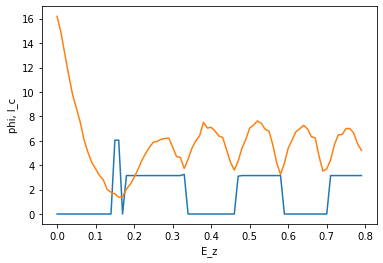

In [56]:
idx_min_E = np.argmin(energies_all, axis=1)
phi_min = phis[idx_min_E]
current_critical = np.amax(currents_all, axis=1)

plt.plot(ezs, phi_min, '-') 
plt.plot(ezs, current_critical, '-') 
plt.ylabel('phi, I_c')
plt.xlabel('E_z')


# Wykresy przykładowych prądów (dla phi=π)

In [50]:
import warnings
warnings.filterwarnings('ignore')

E_z=0.00


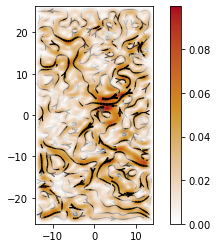

E_z=0.05


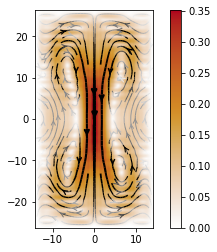

E_z=0.10


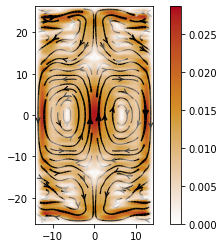

E_z=0.15


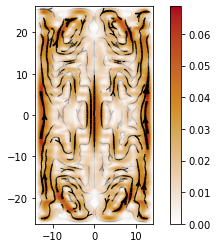

E_z=0.20


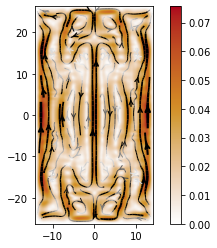

E_z=0.25


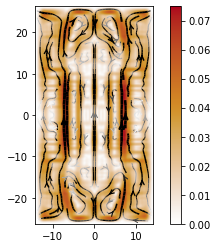

E_z=0.30


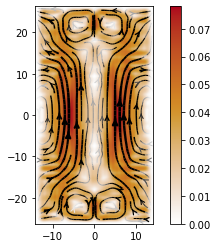

E_z=0.35


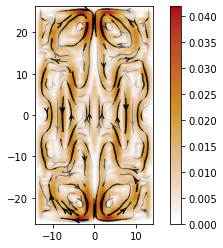

E_z=0.40


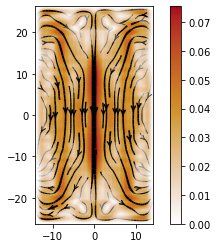

E_z=0.45


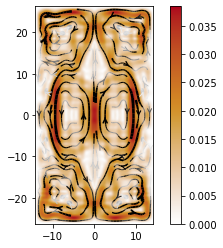

E_z=0.50


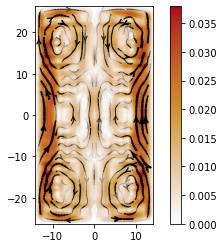

E_z=0.55


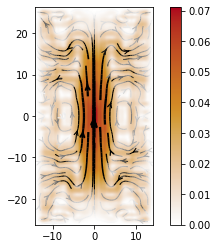

E_z=0.60


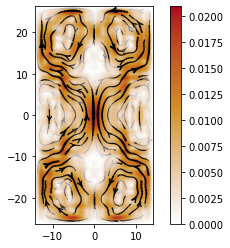

E_z=0.65


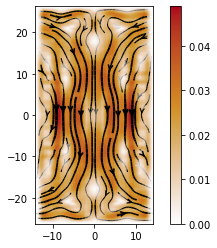

E_z=0.70


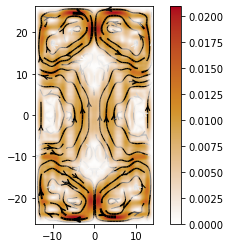

E_z=0.75


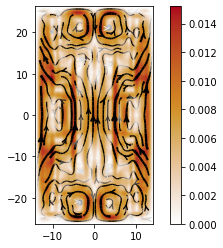

In [58]:
ezs = np.arange(0, 0.8, 0.05)
for ez in ezs:
    par = SimpleNamespace(t=1, mu=2.20, e_z=ez, alpha=0.1 )
    eigvals, eigvecs = func.andreev_states(syst=syst, par=par, phi=np.pi, Delta=0.3)
    kwant_wf = kwant.wave_function(syst, energy=0, args=[par])
    Andreev_bs = func.andreev_wf(eigvecs, kwant_wf)
    current = func.intensity(syst=syst, psi=Andreev_bs, par=par)
    print('E_z=%.2f' %ez)
    kwant.plotter.current(syst, current)
